5717


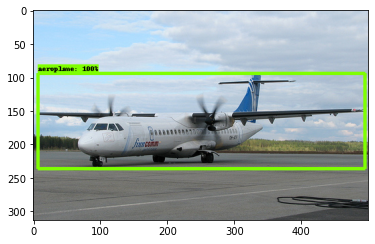

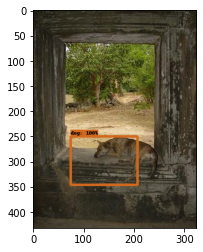

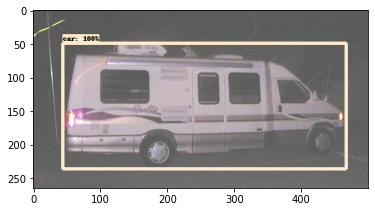

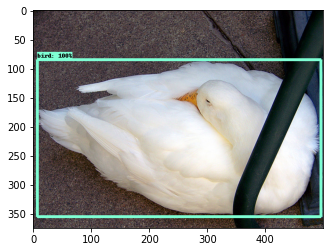

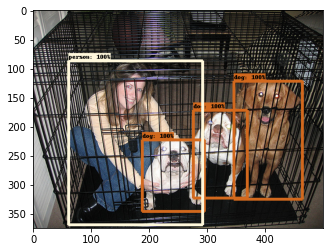

In [4]:
import os
os.chdir("/home/cyh/Code_MAC/Object_detection")
from utils.draw_box_tool import draw_box
from PIL import Image
import json
import matplotlib.pyplot as plt
from utils.transforms import Compose,ToTensor, RandomHorizontalFlip
from torchvision import transforms as ts
import random
from data.voc import VOCDataSet
import os

# read class_indict
category_index = {}
try:
    json_file = open('/home/cyh/DATA/VOCdevkit/VOC2012/pascal_voc_classes.json', 'r')
    class_dict = json.load(json_file)
    category_index = {v: k for k, v in class_dict.items()}
except Exception as e:
    print(e)
    exit(-1)

data_transform = {
    "train": Compose([ToTensor(),
                RandomHorizontalFlip(0.5)]),
    "val": Compose([ToTensor()])
}

# load train data set
train_data_set = VOCDataSet(voc_root="/home/cyh/DATA",year = "2012", transforms=data_transform["train"], txt_name="train.txt")
print(len(train_data_set))
for index in random.sample(range(0, len(train_data_set)), k=5):
    img, target = train_data_set[index]
    img = ts.ToPILImage()(img)
    draw_box(img,
             target["boxes"].numpy(),
             target["labels"].numpy(),
             [1 for i in range(len(target["labels"].numpy()))],
             category_index,
             thresh=0.5,
             line_thickness=5)
    plt.imshow(img)
    plt.show()

In [5]:
print(target)

{'boxes': tensor([[346., 122., 464., 325.],
        [276., 172., 369., 323.],
        [188., 223., 295., 346.],
        [ 61.,  87., 292., 369.]]), 'labels': tensor([12, 12, 12, 15]), 'image_id': tensor([1220]), 'area': tensor([23954., 14043., 13161., 65142.]), 'iscrowd': tensor([0, 0, 0, 0])}


In [ ]:
from collections import OrderedDict
dic2 = OrderedDict()
dic2['a'] = '123'
dic2['b'] = 'jjj'
dic2['c'] = 'abc'
dic2['d'] = '999'
for k, v in dic2.iteritems():
    print('有序字典：%s:%s' %(k,v))